In [1]:
#@title Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
torch.cuda.empty_cache()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/UWE Data Science/Individual project/dataset/reviews_ori.csv'
df = pd.read_csv(file_path)
torch.cuda.empty_cache()

Mounted at /content/drive


In [ ]:
df = df.head(15000)
print(df.shape)
torch.cuda.empty_cache()

(15000, 10)


In [ ]:
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2

df['sentiment'] = df.Score.apply(to_sentiment)
torch.cuda.empty_cache()

In [ ]:
class_names = ['negative', 'neutral', 'positive']
torch.cuda.empty_cache()

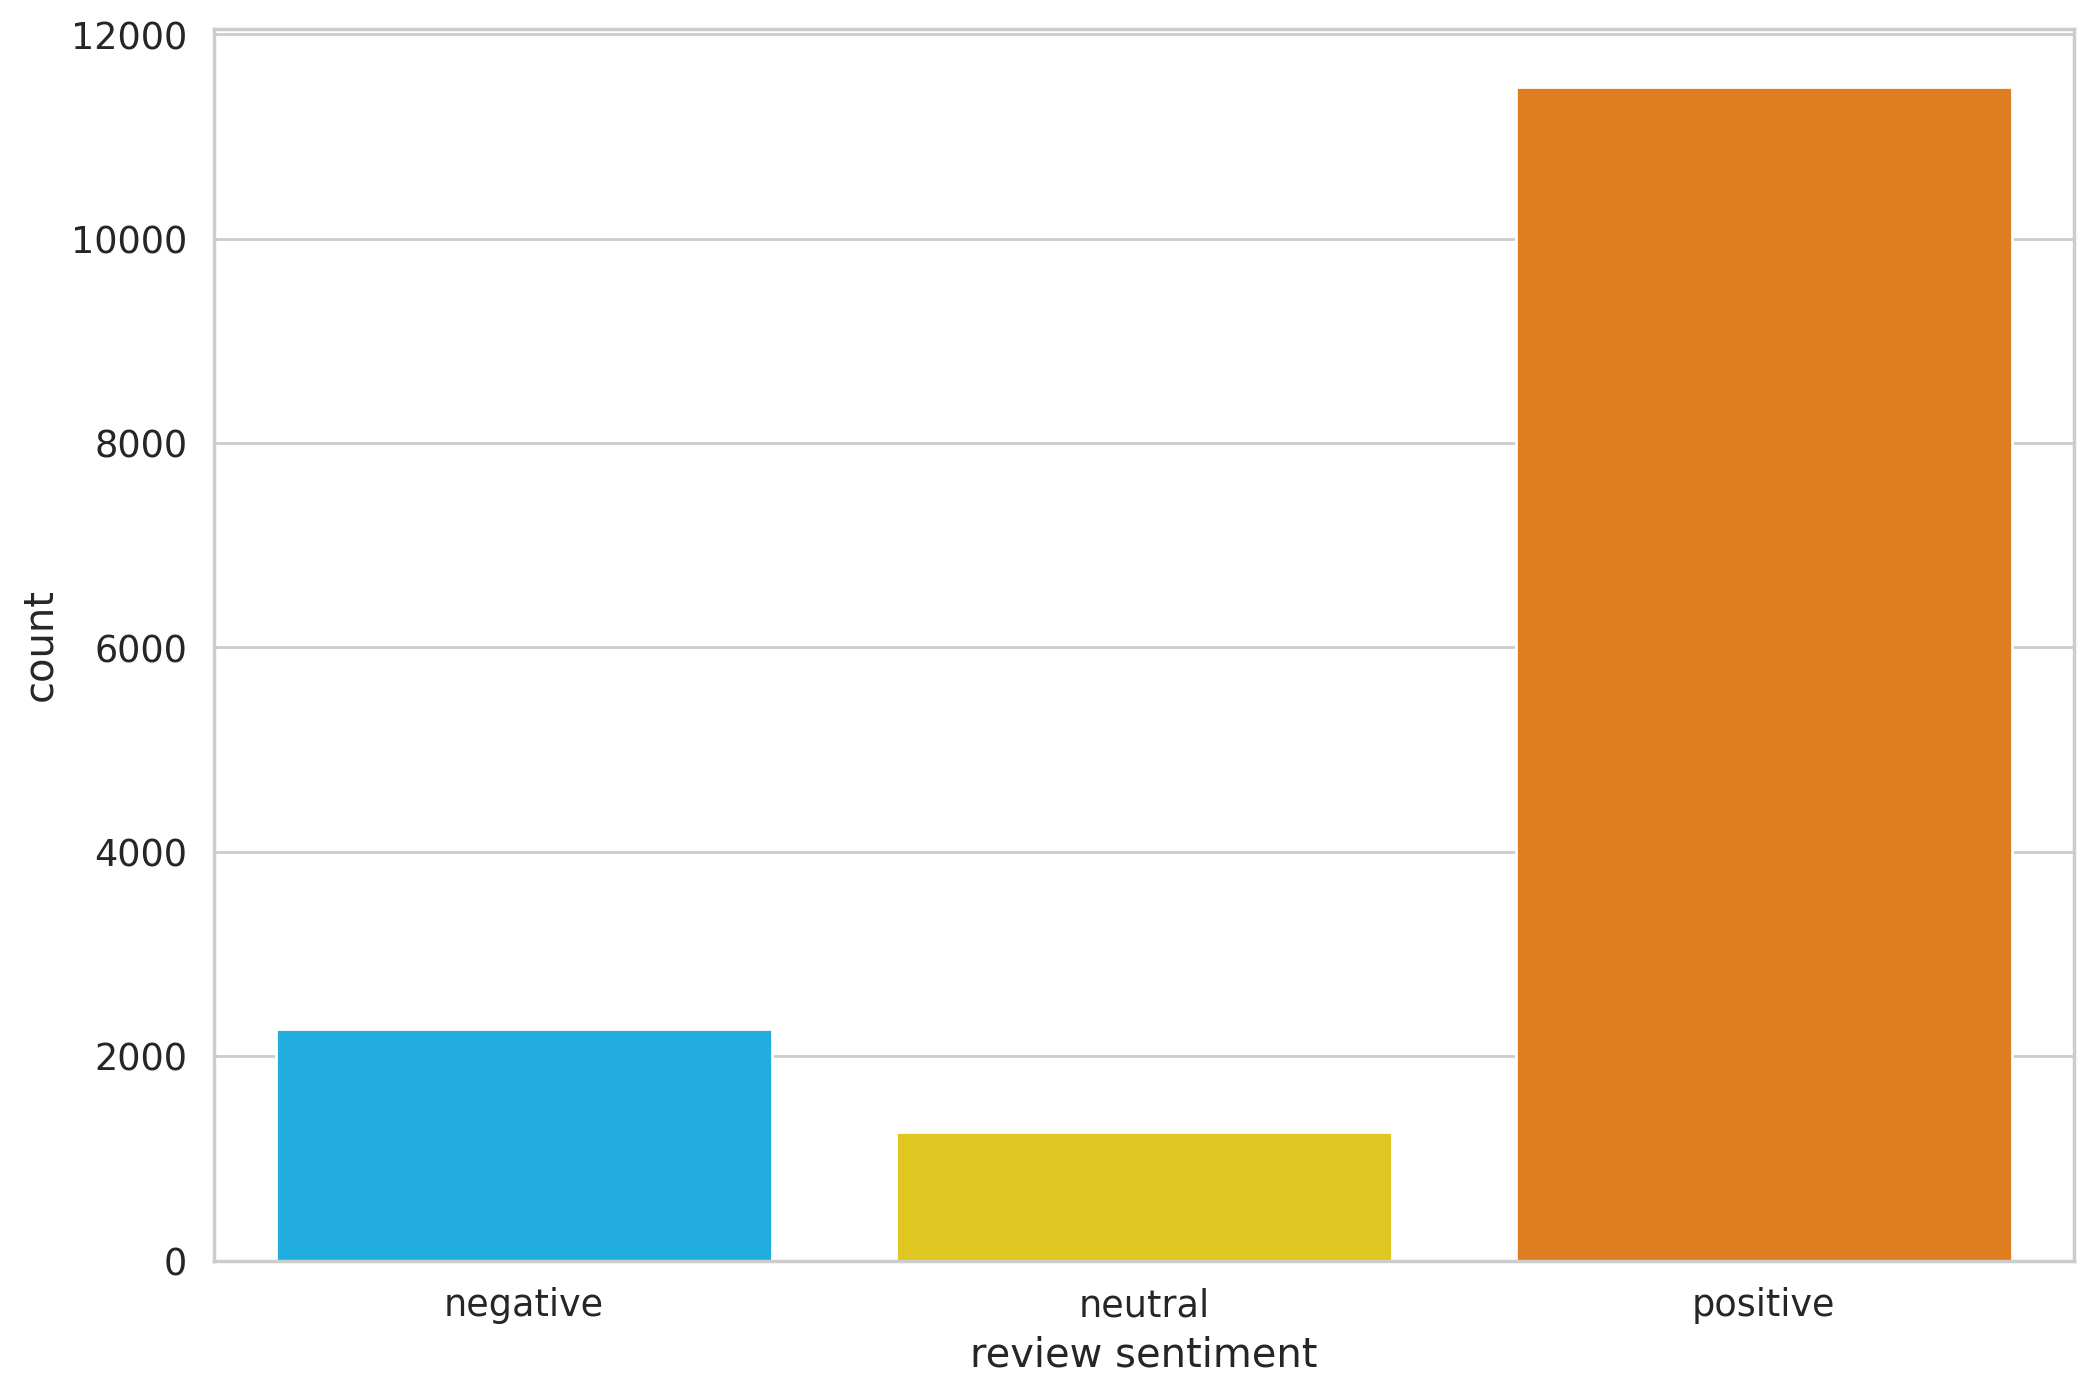

In [ ]:
# Create a count plot using Seaborn
ax = sns.countplot(df, x="sentiment")
#sns.countplot(df,x='Score')
plt.xlabel('review sentiment')

# Set the x-axis tick positions and labels using class_names
ax.set_xticks(range(len(class_names)))
ax.set_xticklabels(class_names)

# Display the plot
plt.show()
torch.cuda.empty_cache()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming df is your DataFrame and 'sentiment' is your target variable
X = df.drop(columns=['sentiment'])
y = df['sentiment']

# Choose the strategy for resampling
# 'minority' will resample the minority class, 'majority' will resample the majority class
resampling_strategy = 'minority'

# Apply oversampling or undersampling
if resampling_strategy == 'minority':
    oversampler = RandomOverSampler(sampling_strategy='minority')
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
else:
    undersampler = RandomUnderSampler(sampling_strategy='majority')
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new DataFrame with resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='sentiment')], axis=1)
df = df_resampled
# Check the new class distribution
print(df['sentiment'].value_counts())


2    11482
1    11482
0     2265
Name: sentiment, dtype: int64


In [ ]:

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['Text'], df['sentiment'], test_size=0.2, random_state=42)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, train_labels)


MultinomialNB()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate accuracy and other metrics
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.821640903686088
Confusion Matrix:
[[ 175  170  134]
 [  16 2002  209]
 [  41  330 1969]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.37      0.49       479
           1       0.80      0.90      0.85      2227
           2       0.85      0.84      0.85      2340

    accuracy                           0.82      5046
   macro avg       0.80      0.70      0.73      5046
weighted avg       0.82      0.82      0.81      5046



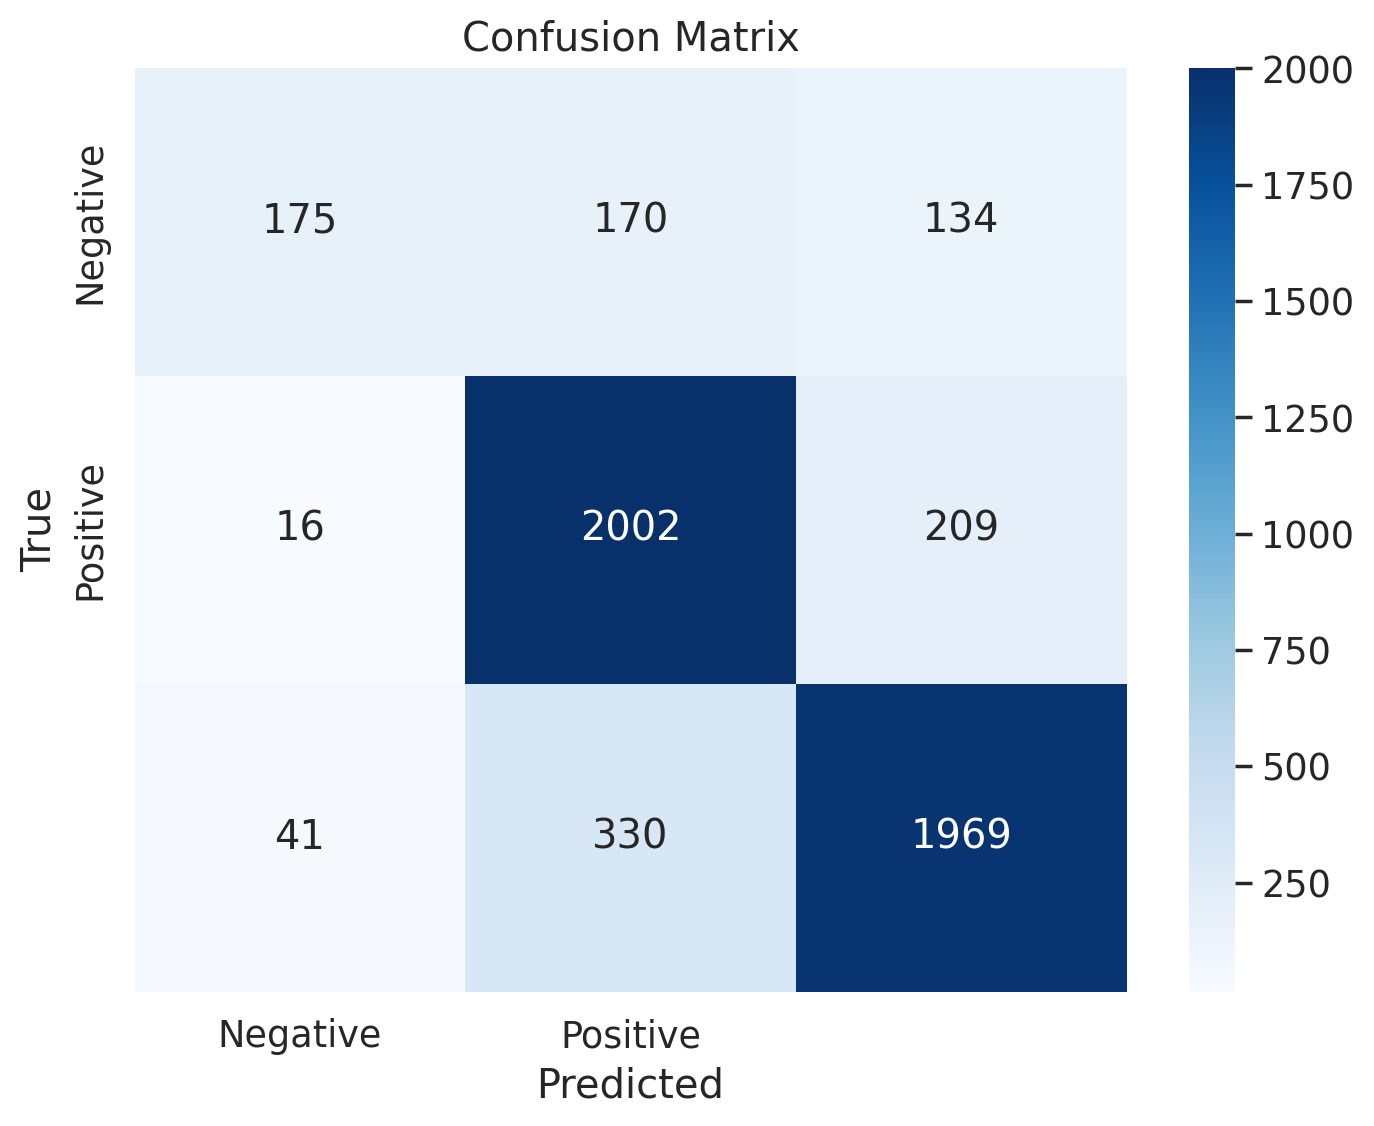

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

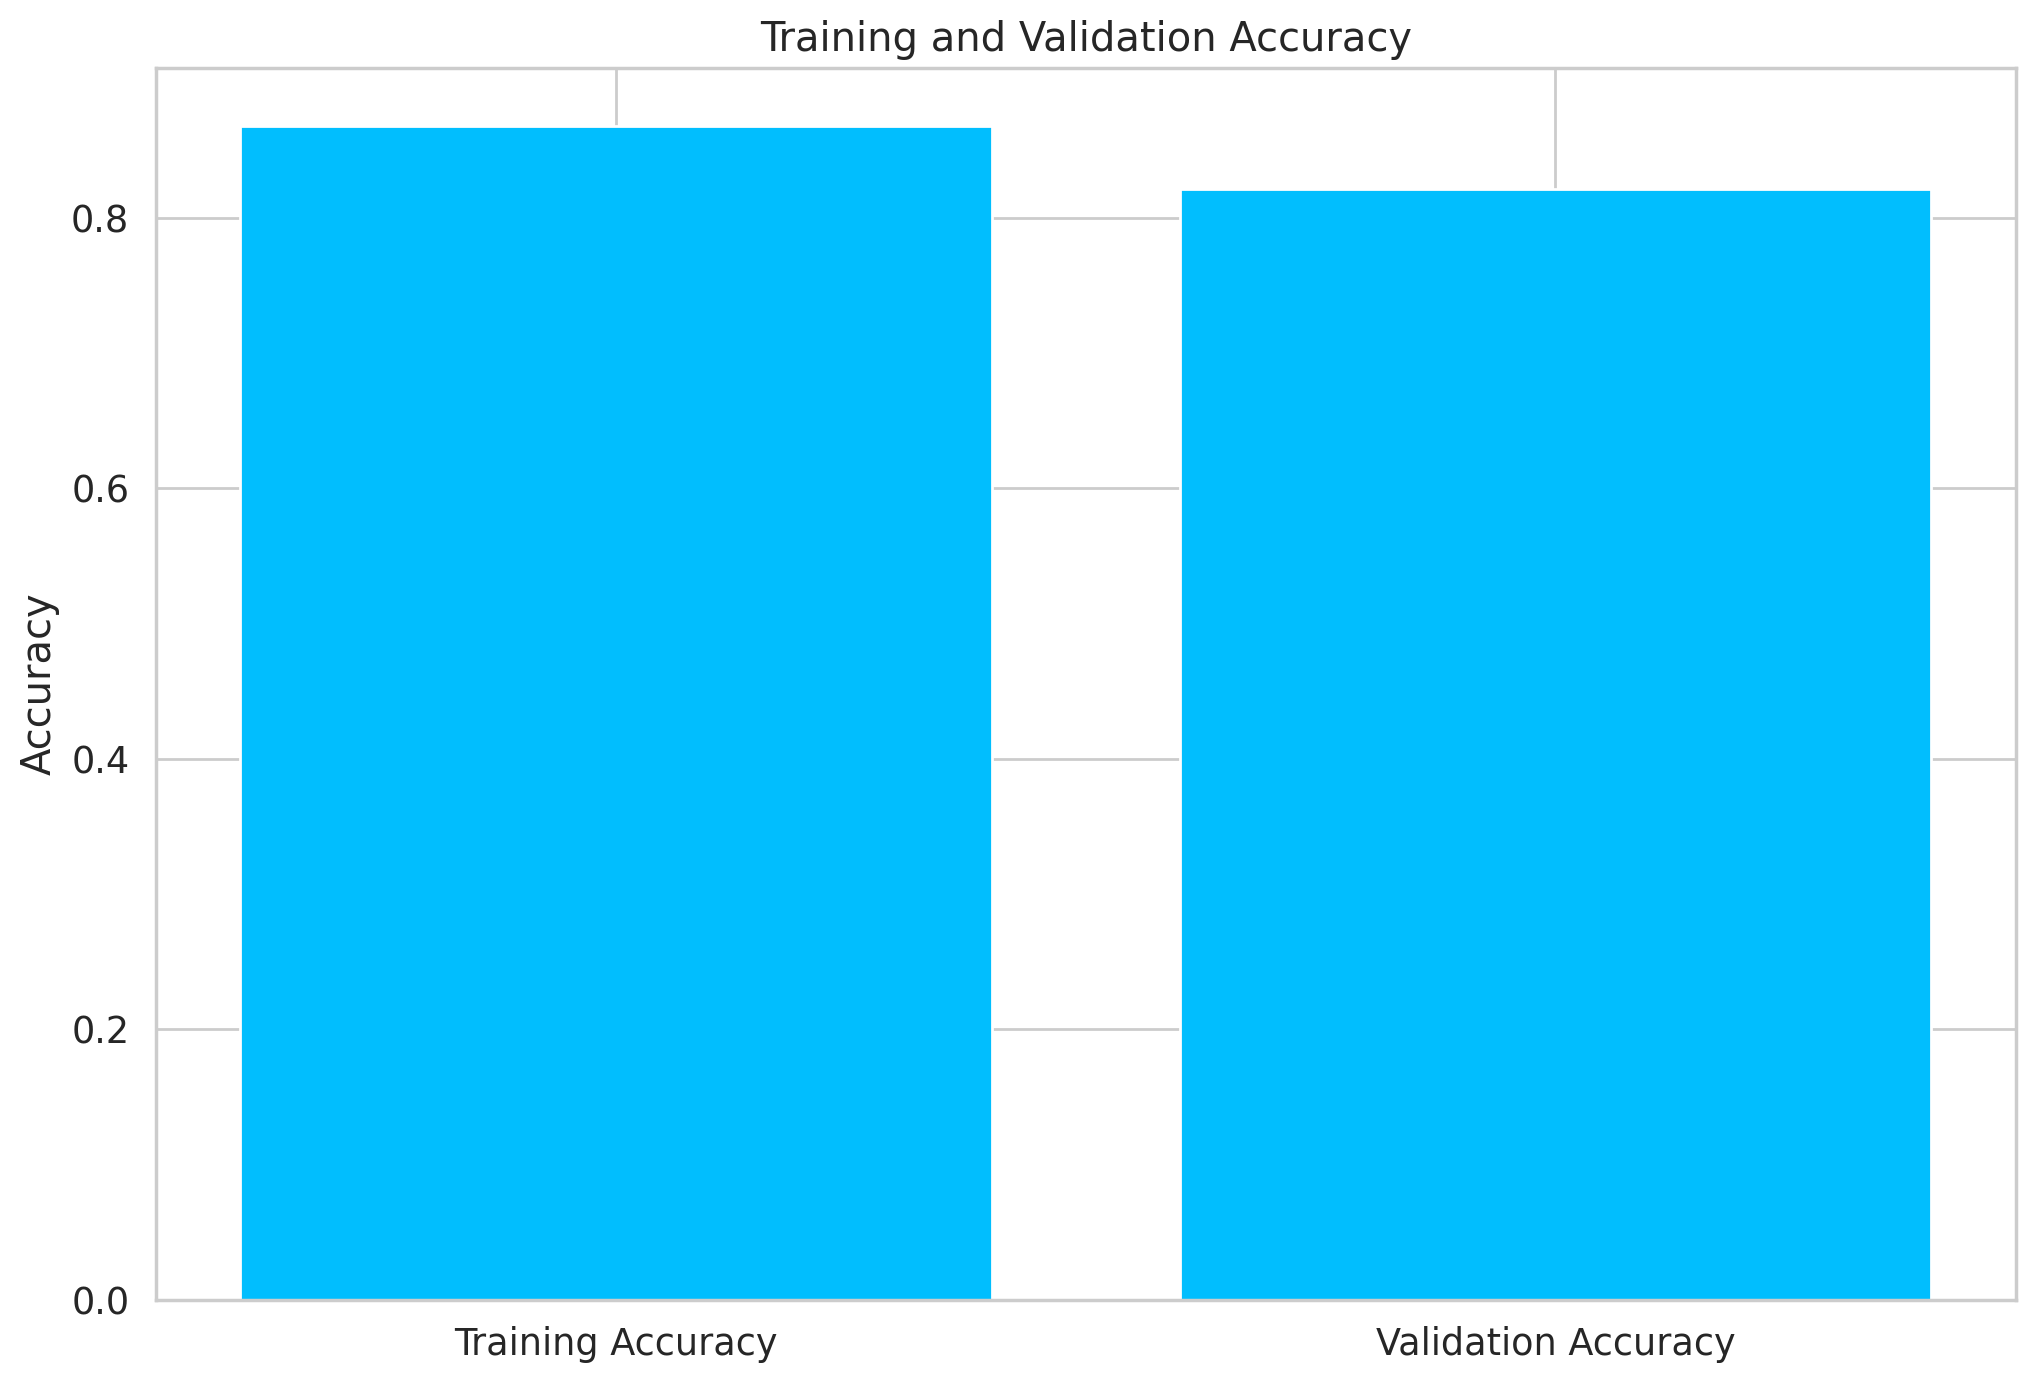

In [ ]:
# Make predictions on the training and validation sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Plot training and validation accuracy
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

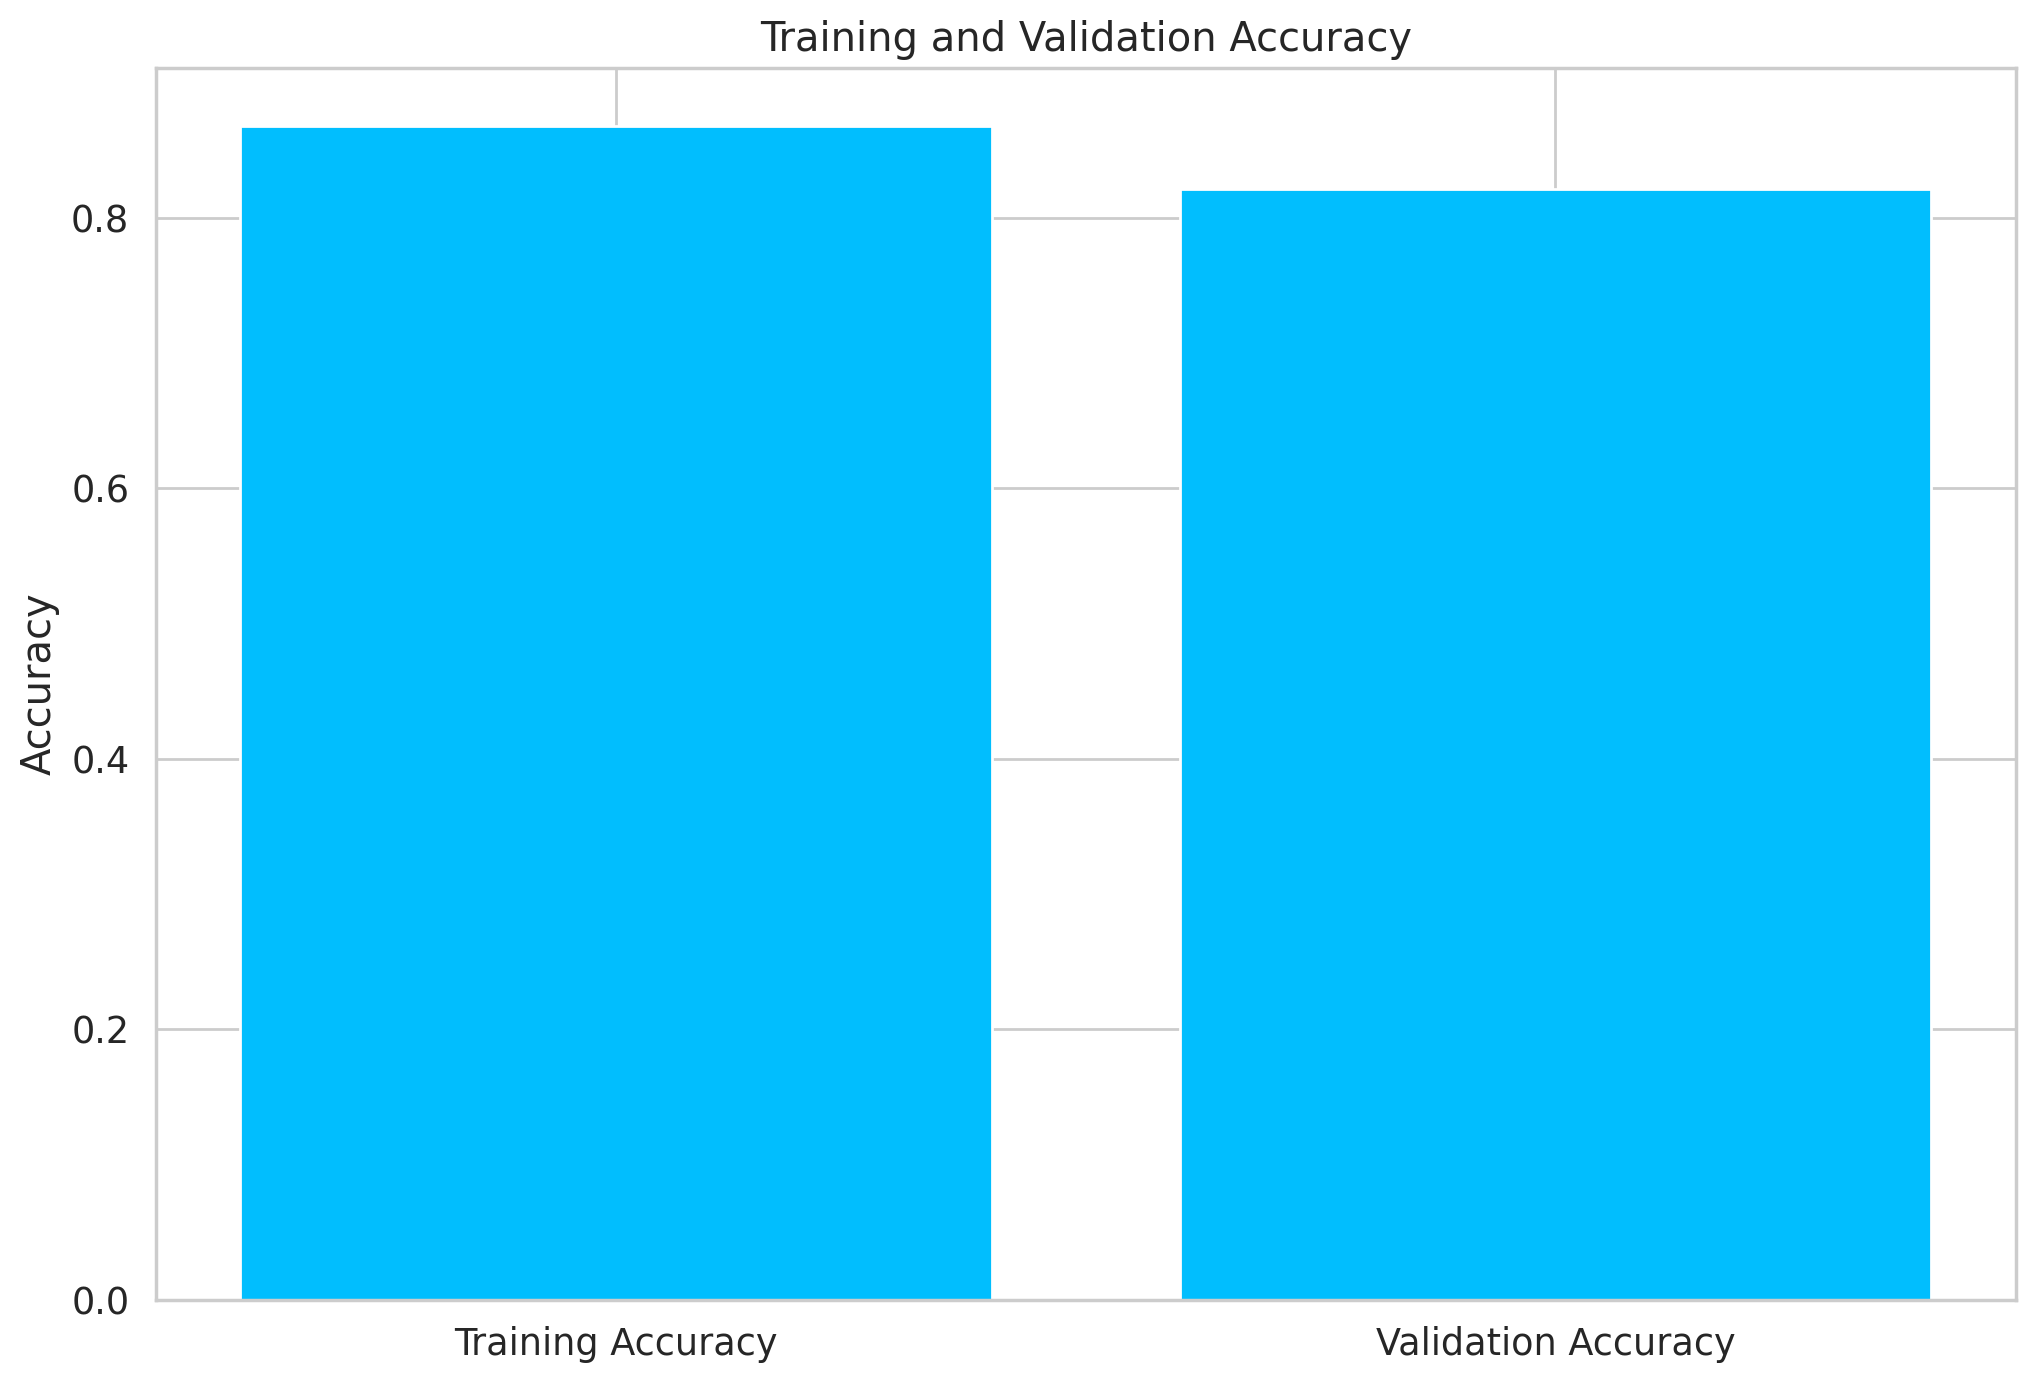

In [ ]:
# Calculate accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Plot training and validation accuracy
plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, test_accuracy])
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

Epoch 1/10
631/631 [==============================] - 18s 27ms/step - loss: -154.6801 - accuracy: 0.4585 - val_loss: -454.8849 - val_accuracy: 0.4413
Epoch 2/10
631/631 [==============================] - 16s 26ms/step - loss: -1063.9543 - accuracy: 0.4586 - val_loss: -1739.6245 - val_accuracy: 0.4413
Epoch 3/10
631/631 [==============================] - 17s 26ms/step - loss: -2746.1685 - accuracy: 0.4586 - val_loss: -3711.2771 - val_accuracy: 0.4413
Epoch 4/10
631/631 [==============================] - 15s 25ms/step - loss: -5084.4858 - accuracy: 0.4586 - val_loss: -6267.7451 - val_accuracy: 0.4413
Epoch 5/10
631/631 [==============================] - 15s 24ms/step - loss: -7999.8081 - accuracy: 0.4586 - val_loss: -9369.0527 - val_accuracy: 0.4413
Epoch 6/10
631/631 [==============================] - 16s 25ms/step - loss: -11449.9238 - accuracy: 0.4586 - val_loss: -12956.2041 - val_accuracy: 0.4413
Epoch 7/10
631/631 [==============================] - 17s 28ms/step - loss: -15366.9033 

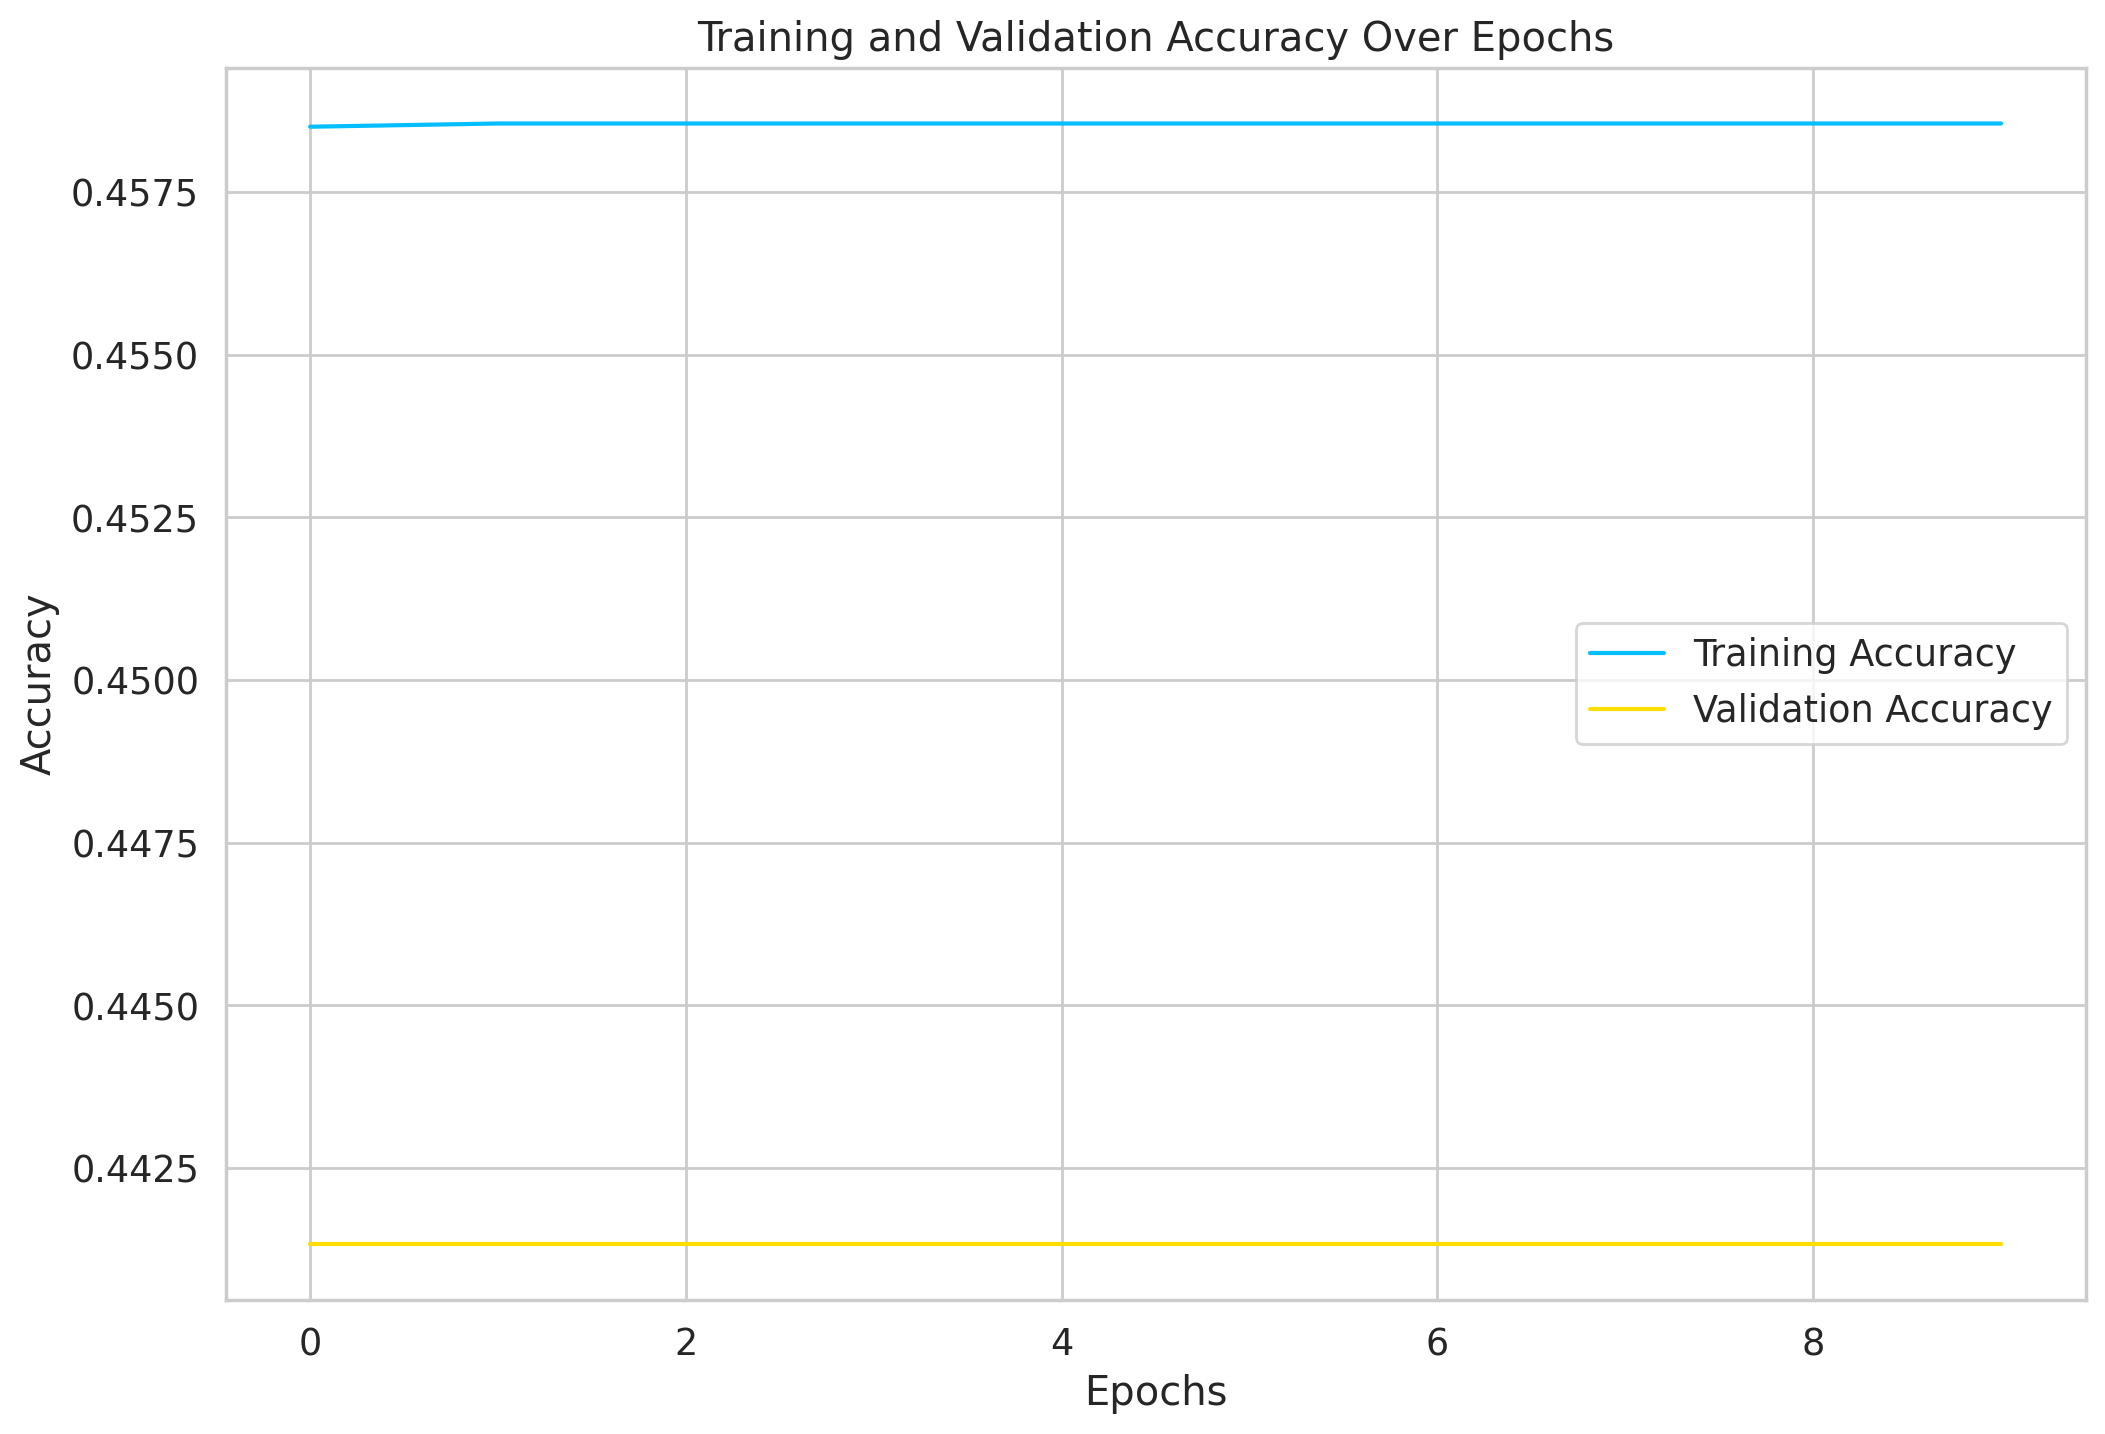

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# ... (loading and preprocessing data)

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

# Convert labels to numerical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

# Convert sparse matrix to a dense NumPy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Initialize and compile a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_dense.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and collect history
history = History()
model.fit(X_train_dense, y_train, epochs=10, validation_data=(X_test_dense, y_test), callbacks=[history])

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()
